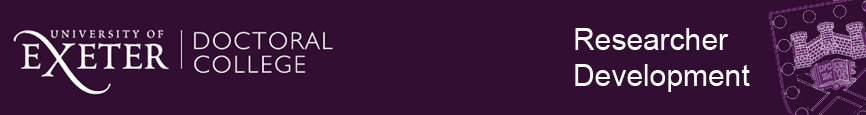

In [1]:
# Ignore this code; it's only here to display the image below
%matplotlib inline
from IPython.display import Image
Image("../img/logo.jpg")

# Python for scientific research
# String manipulation and regular expression

### Bram Kuijper
### University of Exeter, Penryn Campus, UK
### February 2020

# String manipulation

## String escape sequences

To add newlines and other special characters to our text we can use a range of [escape sequences](https://docs.python.org/3/reference/lexical_analysis.html#grammar-token-stringescapeseq). The most important ones are
* `'\n'`: newline
* `'\t'`: tab
* `'\"'`: `"` (double quotes)
* `'\''`: `'` (single quotes)
* `'\xhh'`: character with hex value `hh`
When one interfaces with online databases or text files (think of a tab-separated csv file, for example), an understanding of these escape characters becomes essential.


## Exercise 1
Write a single-quoted byte string (i.e., `b'..'`) and print it to the screen using its member function [`bytes.decode()`](https://docs.python.org/3/library/stdtypes.html?highlight=byte%20decode#bytes.decode). The resulting message should be:

`Bob told the PI:  
        "That complicated data 'pipeline'? She automated that already, using Python.
        She is now 'working remotely' from a château near Saint-Raphaël in France."`

Hint: for the international characters, use the hexadecimal codes from the online [UTF-8 tool](http://www.ltg.ed.ac.uk/~richard/utf-8.cgi?input=%C3%A2&mode=char)

## String methods
Python has a number of [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods) to manipulate text. A number of important ones are (optional arguments are ommitted, but links are provided to the official documentation):

| Function name | What does it do? |
|:-------------|:-------------|
| [`str.count(sub)`](https://docs.python.org/3/library/stdtypes.html#str.count) | Total number of non-overlapping occurrences of substring `sub` in `str` |
| [`str.find(sub)`](https://docs.python.org/3/library/stdtypes.html#str.find) | Finds the leftmost occurrence of substring `sub` in `str` |
| [`str.join(iterable)`](https://docs.python.org/3/library/stdtypes.html#str.join) | Concatenates elements in `iterable` using the concatenation string `str` |
| [`str.strip()` ](https://docs.python.org/3/library/stdtypes.html#str.strip) | Strips whitespace from both sides of `str` |
| [`str.split(sep)` ](https://docs.python.org/3/library/stdtypes.html#str.split) | Splits a string into a list of substrings, using separator string `sep` |

## Exercise 2
1. Write a function that randomly samples 20 items from a `list` of values, where each value is either a number between 1 and 10 or a whitespace. The function returns a `str` object of a single line containing all values, separated by commas, for example:

`5,10,1,9,8,6,8,4,4,6, ,9,6,1,2,2,10,5,1, `

Use the [`numpy.random.sample()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html#numpy.random.choice) function from the `numpy.random` library to randomly sample `size=20` values from a `list` object.

2. Write a second function, which takes the comma-separated string that you just generated as an argument. The function then counts the number of occurrences of each number or a whitespace in the string. The function should print a string that gives a value (i.e., a number or a whitespace) and the number of times this value was counted. Values that were not encountered in the string should have a count of 0.

**Hint ** There are different ways of counting occurrences of all characters in a text. Typically using a dictionary is the most efficient.

For the example string `5,10,1,9,8,6,8,4,4,6, ,9,6,1,2,2,10,5,1, ` above, the output should be:  
`Value 1 occurred 3 times.`  
`Value 2 occurred 2 times.`  
`Value 3 occurred 0 times.`  
`Value 4 occurred 2 times.`  
`Value 5 occurred 2 times.`  
`Value 6 occurred 3 times.`  
`Value 7 occurred 0 times.`  
`Value 8 occurred 2 times.`  
`Value 9 occurred 2 times.`  
`Value 10 occurred 2 times.`  
`Value   occurred 2 times.`

***

# Regular Expressions

To work with regular expressions (regexes) we need to import the `re` package:

In [2]:
import re

### Some of the key functions to find and replace regex patterns

The functions below are the ones most often used to find matching patterns. Clicking on the function names should take you to the corresponding Python documentation.

| Function name | What does it do? |
|:---------|:---------|
| [`re.compile()`](https://docs.python.org/3/library/re.html?highlight=re%20search#re.compile) | Compiles a regular expression before using it. Avoid unless you use the same regex 1000s of times |
| [`re.findall()`](https://docs.python.org/3/library/re.html?highlight=re%20search#re.findall) | Finds all non-overlapping matches of a pattern in a string and returns a list containing all matches |
| [`re.search()`](https://docs.python.org/3/library/re.html?highlight=re%20search#re.Pattern.search) | Finds the first occurrence of a pattern in a string and returns a [MatchObject](https://docs.python.org/3/library/re.html?highlight=re%20search#match-objects) |
| [`re.sub()`](https://docs.python.org/3/library/re.html?highlight=re%20search#re.sub) | Replaces a matching pattern with a replacement string |

### Symbols to define character classes and escape sequences
Regexes are built on the principle that the character `'f'` matches occurrences of that character `'f'` in string. However, one often needs to match patterns that can include large numbers of potential characters. To facilitate this, Python `regex`es include symbols that reflect particular character classes...

| Symbol | Meaning |
|:-----|:-----|
| `.` | Matches any character |
| `[abc]` | Matches any of the characters `'a'`, `'b'` or `'c'`  |
| `[^abc]` | Matches anything but the characters `'a'`, `'b'` or `'c'`  |
| `[a-z]` | Matches a range of characters (in this case all lowercase characters) |
| `^a` | Matches the character `'a'` at the start of the string |
| `a$` | Matches the character `'a'` at the end of the string |
| `a\|b` | Matches character `'a'` or character `'b'` |


.. and escape sequences:

| Escape character | Meaning |
|:-----|:-----|
| `\d` | Matches any decimal digit; this is equivalent to the class `[0-9]` |
| `\D` | Matches any non-digit character; this is equivalent to the class `[^0-9]` |
| `\s` | Matches any whitespace character; this is equivalent to the class `[ \t\n\r\f\v]` |
| `\S` | Matches any non-whitespace character; this is equivalent to the class `[^ \t\n\r\f\v]` |
| `\w` | Matches any alphanumeric character; this is equivalent to the class `[a-zA-Z0-9_]` |
| `\W` | Matches any non-alphanumeric character; this is equivalent to the class `[^a-zA-Z0-9_] ` |

If you want to actually match a backslash `\` or another protected regular expression character such as `[`, you can match them by *escaping* these characters: i.e., by writing `\\` and `\[` respectively. 

### Note:

As we do not want Python to substitute any backslashes for characters, regular expressions always require **raw strings**, i.e., `r"..."`

### Example: searching for a backslash
Find a backslash in a string. Set up two example strings, one that contains the backslash, one which does not:

In [3]:
import re

# the two examples
str_with_backslash = r"did you see that backslash \ somewhere?"
str_without_backslash = r"No it's gone..."
print(str_with_backslash)
print(str_without_backslash)

did you see that backslash \ somewhere?
No it's gone...


### Example continued: searching for a backslash using match objects
Now use the function `re.search()` to search for the backslash within `str_with_backslash`. If successful, `re.search()` returns a [match object](https://docs.python.org/3/library/re.html?highlight=re%20search#match-objects), which contains the matched substrings.

In [4]:
# Search for a backslash, by simply escaping a backslash:
result_backslash = re.search(r"\\",str_with_backslash) 

print(result_backslash)

<re.Match object; span=(27, 28), match='\\'>


If `re.search()` is not successful, it returns `None`:

In [5]:
result_no_backslash = re.search(r"\\",str_without_backslash) 

print(result_no_backslash)

None


The match object `result_backslash` has the method `Match.group(0)` to retrieve the value of the first (and in this case, only) match.  
We can use the method `Match.span()` to find the (start,end) positions *where* the pattern matches:

In [6]:
# the matched substring (in this case just a slash)
print(result_backslash.group(0)) 

# (start, end) position
print(result_backslash.span(0)) 

\
(27, 28)


## Exercise 3

1. Write a function that uses a regular expression to check whether a lowercase string is a DNA sequence: i.e., it only contains the 4 nucleotides 'c', 'g', 'a', 't'
2. Test the function: generate a list with strings and call the function repeatedly within a `for` loop. If the current string (say, `'cccggcgggg'` is indeed a sequence, the text `'The sequence 'cccggcgggg' is a sequence'` should appear. Whereas if the current string is not a sequence, the text `The sequence 'cccbcgggg' is not a sequence'` should appear.

### Regular expression character classes and repetition

Next, we introduce a number of modifiers that allow you to change the number of occurrences of a pattern that need to be matched:

| Repetition modifier | Meaning |
|:-----|:-----|
| `a{1,4}` | Matches `'a'` when it occurs in groups of 1 to 4 |
| `a{1,4}?` | Matches `'a'` when it occurs in groups of 1 to 4, with as few repetitions as possible |
| `a*` | Matches `'a'` any number of times (including no match at all)  |
| `a+` | Matches `'a'` one or more times  |
| `a?` | Matches `'a'` zero or one times  |


## Exercise 4

1. Try to match all characters but the first two and the last two in the string `'?:SADF005A3WERB1Fdk95fjdkjerij@!'` (note that the quotation marks `'` indicate that it is a string and need not be matched). You can either use [regex101](https://regex101.com/) or your spyder IDE. In the latter case, use the function `re.search()` to return a `match object` that is contained in the variable `m_obj`. 

2. If you used spyder: how many characters does your `m_obj.group(0)` contain? If only one, what modifier do you need to add to the regular expression to change this into a match that contains the complete `SADF005A3WERB1Fdk95fjdkjerij` string? If you have used [regex101](https://regex101.com/), make sure that you also obtain only have 1 match, rather than many matches.

## Grouping and remembering
When we want to replace pattern matches with another string in the function [`re.sub()`](https://docs.python.org/3/library/re.html?highlight=re%20sub#re.sub), it can useful to be able to remember the patterns that we matched. A case in point are multiple dates, each in format `dd-mm-yyyy` that need to be replaced by dates in the format `yyyy.mm.dd`. In this case, it would be handy to be able to remember the year, month and day part of each match, so that we can simply swap the matched pattern around.

To remember matches, we use grouping: i.e., we use parentheses `()` to create groups of patterns. For example, if we want to remember a sequence of exactly four digits representing a year we simply write `(\d{4,4})` rather than `\d{4,4}`. When we replace this pattern by some other text, we can remember this group by using the number of the group preceded by a backslash (e.g., `\1`,`\2`).

### Grouping and remembering: example
To illustrate grouping, let's look at an example: say we have the following list of unique identifiers corresponding to individuals in a medical database:  
`id4819;id3019;id4019;id1020;`

The database admin messed up his scripts, however, as the last two digits of each id should, in fact, precede the first two digits. For the first id, the correct code should have been `id1948` rather than `id4819`. Regex to the rescue?

### Grouping and remembering: solution

In [7]:
idstr="id4819;id3019;id4019;id1020;"
print(re.sub(pattern=r"(\d{2,2})(\d{2,2})",repl=r"\2\1",string=idstr))

id1948;id1930;id1940;id2010;


By using parentheses to group the two 2-digit patterns `(\d{2,2})(\d{2,2})` and subsequently replacing the order of the found groups `"\2\1"` we can easily switch the order of the two groups of numbers.

## Exercise 5
1. Use `re.sub()` to write `"23.11.1980,29-12-2019,23051974"` as `"1980-11-23,2019-12-29,1974-05-23"`
2. Write a function that accepts a list with strings like the one below (i.e., a list of files in a directory)...  
  
`["tempfile_000","sim_evol_29_03_2015_349348329","sim_evol_29_03_2015_349348329_distribution1","sim_evol_29_03_2015_349348329_graph","sim_evol_29_03_2015_990999","sim_evol_29_03_2015_990999_distribution1","sim_evol_29_03_2015_9"]`  
  
.. and retains only the following three elements (within the function you will need to loop and filter the above list):
`["sim_evol_29_03_2015_349348329","sim_evol_29_03_2015_990999","sim_evol_29_03_2015_9"]`

**Hint**: you might want to try your pattern on [regex101](https://regex101.com). As a test string, use the following list below (where we removed the quotation marks and the straight brackets). We do not want to match the complete thing, rather we would like to match against each line individually, hence put each item on a separate line in the 'Test String' form (if pasting this below, you might want to delete any trailing whitespace):

``
tempfile_000  
sim_evol_29_03_2015_349348329  
sim_evol_29_03_2015_349348329_distribution1  
sim_evol_29_03_2015_349348329_graph  
sim_evol_29_03_2015_990999  
sim_evol_29_03_2015_990999_distribution1  
sim_evol_29_03_2015_9  
``


PS: this is a surprisingly common task: if you want to work with large numbers of files, regexes are often the tool of choice for filtering filenames
